In [1]:
import tensorflow as tf
if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

In [3]:
print(tf.__version__)

2.0.0


# STEP 1 : Loading Data 

**The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.**

**x_train and x_test parts contain greyscale RGB codes (from 0 to 255) .**

**y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.**




In [3]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   
import pandas as pd
import matplotlib.pyplot as plt

p = pd.join(x_train[6, :, 12:20] , x_train[7, :, :20])

plt.imshow(x_train[7, :, :20], cmap='Greys')
y_train[2]


print(p.shape)

AttributeError: module 'pandas' has no attribute 'join'

# STEP 2 : DATA PREPROCESSING

We have to scale x_train and x_test so that all values are in the [0, 1] interval. **Why do we need to scale ?** goal of scaling is to speed up the algorithm's computation . It is used to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. It is also required for some algorithms to model the data correctly.





In [8]:
x_train, x_test = x_train / 255.0  ,  x_test / 255.0
type(x_train)


numpy.ndarray

# STEP 3 : BUILD NEURAL NETWORK MODEL

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# STEP 4 : COMPILATION

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(y_train)

[5 0 4 ... 5 6 8]


# STEP 5 : TRAIN THE MODEL

In [9]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2939 - accuracy: 0.9157
Epoch 2/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.1416 - accuracy: 0.9583
Epoch 3/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1077 - accuracy: 0.9682
Epoch 4/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0865 - accuracy: 0.9728
Epoch 5/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0737 - accuracy: 0.9772


# STEP 6 : EVALUATE THE TRAINING 

### Now let’s check that the model performs well on the test set, too:

In [10]:
evaluation = model.evaluate(x_test,  y_test, verbose=2)      

10000/1 - 1s - loss: 0.0416 - accuracy: 0.9764


In [11]:
print(evaluation[0])   #test loss
print(evaluation[1])   #test accuracy

0.07697266629580408
0.9764


# STEP 7 (optional) : PREDICTION

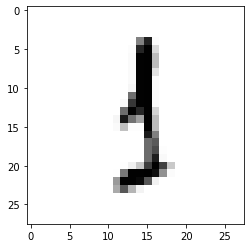

In [13]:
import matplotlib.pyplot as plt
# form PLT import Image
plt.imshow(x_test[900],cmap='Greys')
# model.predict_classes(x_test[90].reshape(1, 28, 28 ))


In [17]:
model.predict_classes(x_test[7].reshape(1,28,28))

array([9], dtype=int64)

In [18]:
y_test[7]

9

In [19]:
import numpy as np

x = np.array([1,2])
y = np.array([3,4])
np.dot(x,y)

11

In [28]:
from PIL import Image
# im = Image.open("./download.jpg")
im = plt.imread("./download.jpg")
im

# im.thumbnail(28,28)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]